In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("C:/Users/karna/Downloads/international-airline-passengers.csv",usecols=[1])
df.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112.0
1,118.0
2,132.0
3,129.0
4,121.0


In [5]:
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


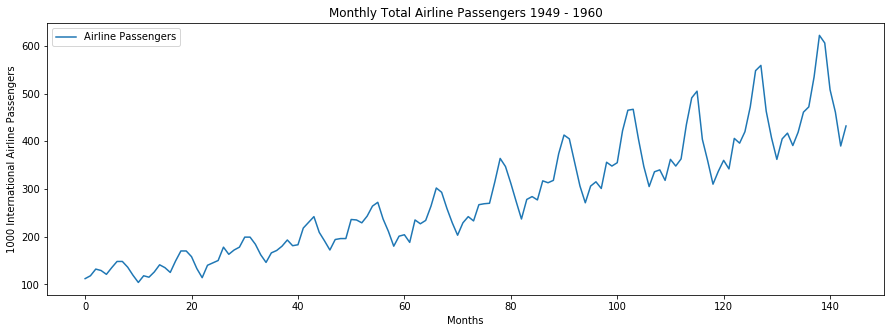

In [6]:
plt.figure(figsize = (15, 5))
plt.plot(df, label = "Airline Passengers")
plt.xlabel("Months")
plt.ylabel("1000 International Airline Passengers")
plt.title("Monthly Total Airline Passengers 1949 - 1960")
plt.legend()
plt.show()

In [7]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
from statsmodels.tsa.stattools import acf,pacf

In [8]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
    plt.xlabel('Time in Years', fontsize = 10)
    plt.ylabel('Total Emissions', fontsize = 10)
    plt.legend(loc='best', fontsize = 10)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 25)
    plt.show(block= True)

In [9]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        

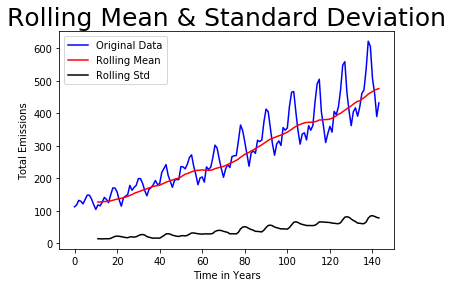

In [10]:
TestStationaryPlot(df)

In [11]:
df = df.dropna()

In [12]:
TestStationaryAdfuller(df.iloc[:,0])

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


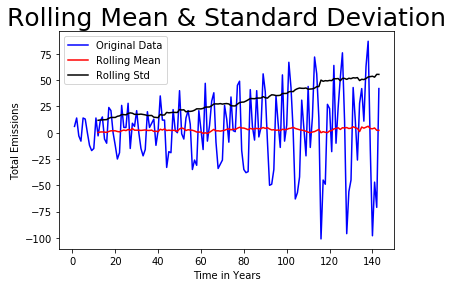

In [13]:
df_first_difference = df - df.shift(1)  
TestStationaryPlot(df_first_difference.dropna(inplace=False))

C:\Users\karna\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


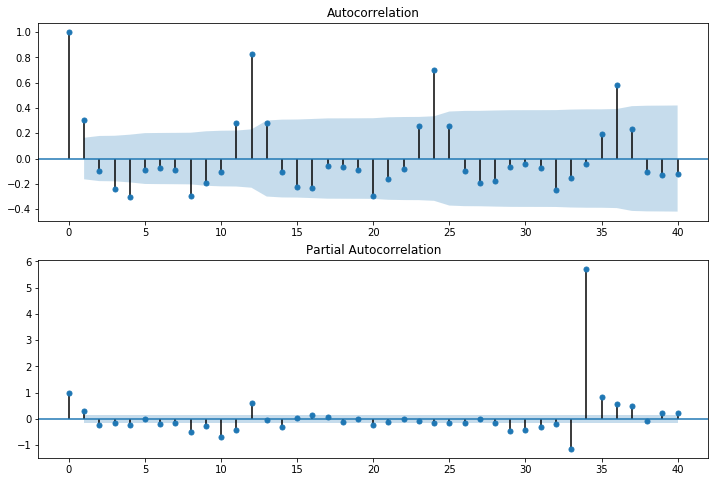

In [14]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_first_difference.dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_first_difference.dropna(), lags=40, ax=ax2)


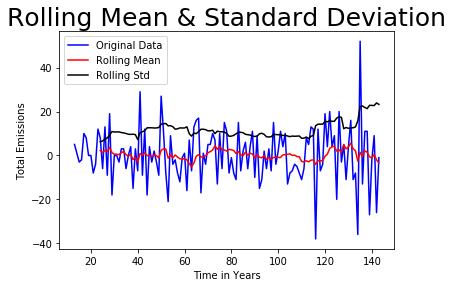

In [15]:
diff12 = df_first_difference - df_first_difference.shift(12)  
TestStationaryPlot(diff12.dropna(inplace=False))

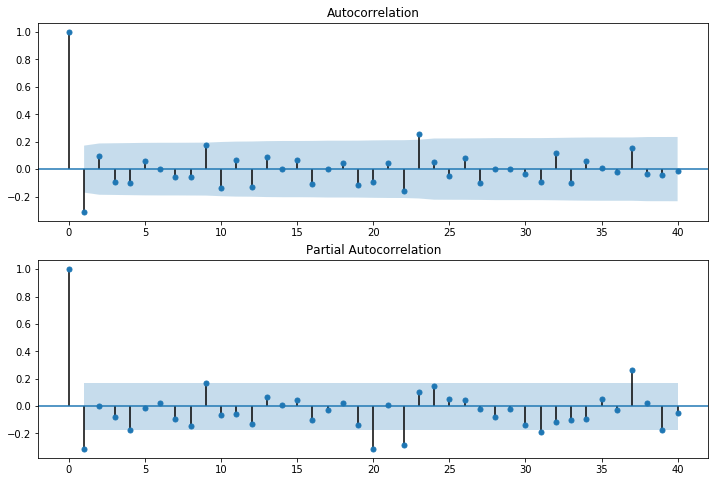

In [16]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff12.dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff12.dropna(), lags=40, ax=ax2)

In [17]:
TestStationaryAdfuller(diff12.iloc[:,0].dropna())

Test Statistic                -1.559562e+01
p-value                        1.856512e-28
#Lags Used                     0.000000e+00
Number of Observations Used    1.300000e+02
Critical Value (1%)           -3.481682e+00
Critical Value (5%)           -2.884042e+00
Critical Value (10%)          -2.578770e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [18]:
ts = pd.read_csv("C:/Users/karna/Downloads/international-airline-passengers.csv")
ts.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [19]:
ts = ts.dropna()

In [20]:
ts.reset_index(inplace=True)
ts['Month'] = pd.to_datetime(ts['Month'])
ts = ts.set_index('Month')


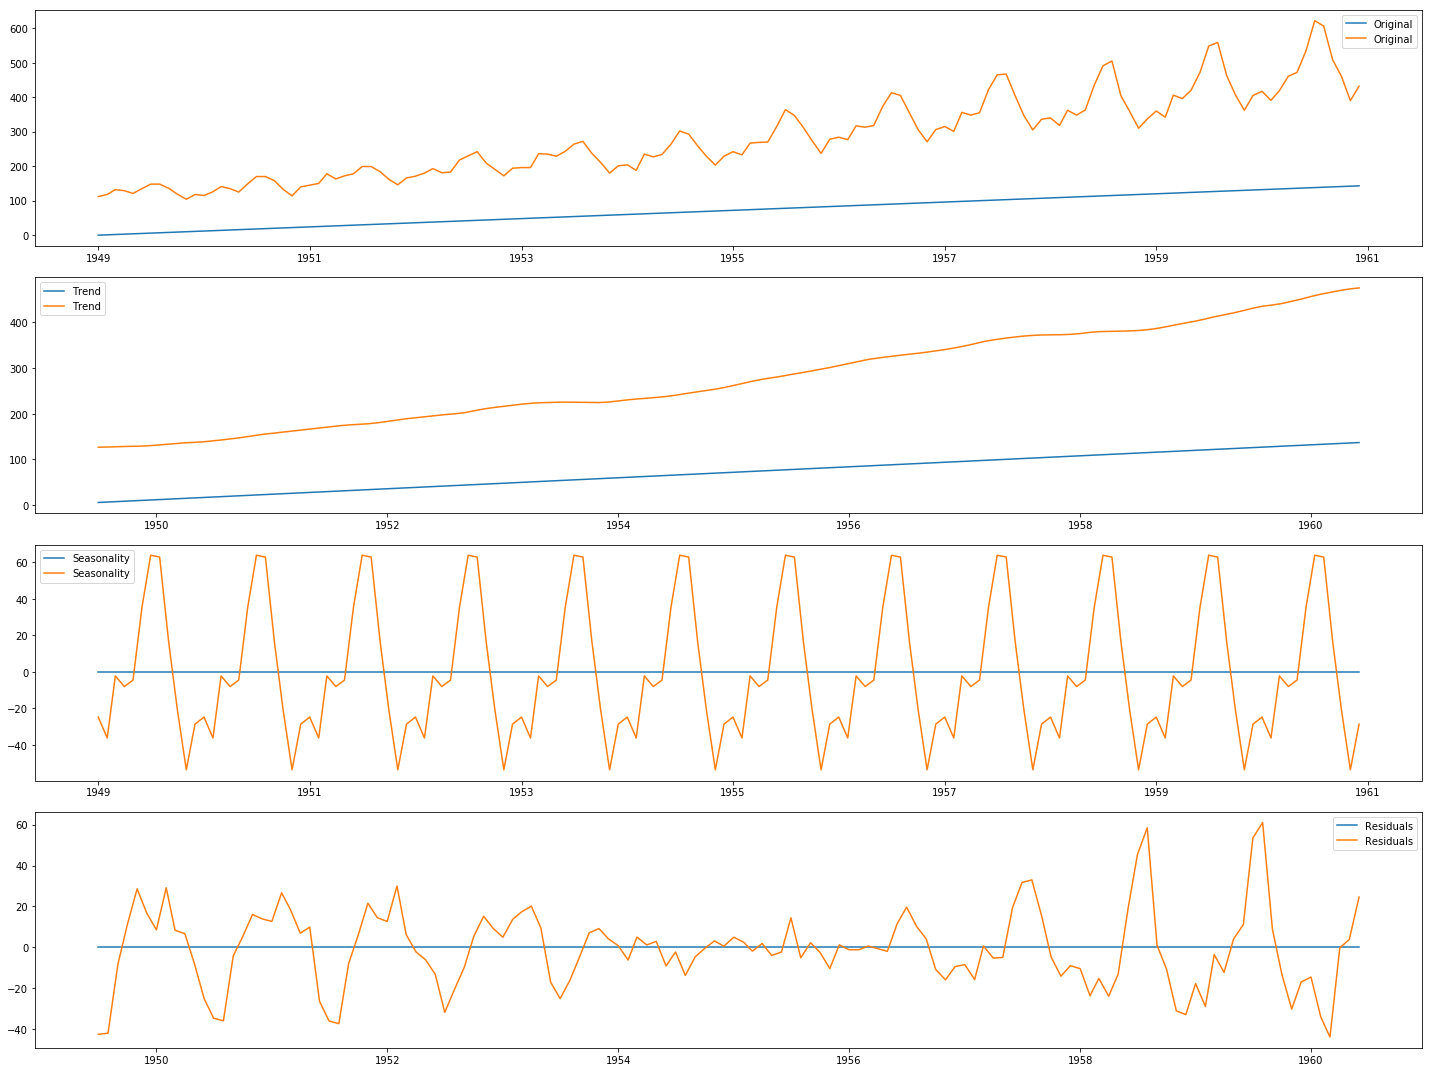

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig,ax = plt.subplots()
fig.set_size_inches(20,15)
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


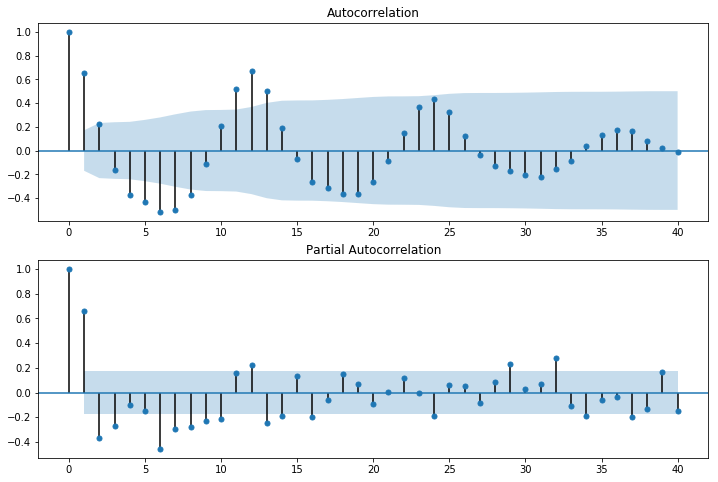

In [22]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residual.iloc[:,1].dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residual.iloc[:,1].dropna(), lags=40, ax=ax2)

In [23]:
TestStationaryAdfuller(residual.iloc[:,1].dropna())

Test Statistic                  -5.298428
p-value                          0.000006
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


## Choose differencing

In [24]:
mod = sm.tsa.statespace.SARIMAX(ts.iloc[:130,1].dropna(), 
                                order=(0,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                                         Statespace Model Results                                                         
Dep. Variable:     International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60   No. Observations:                  130
Model:                                                             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -391.017
Date:                                                                            Sun, 02 Dec 2018   AIC                            788.034
Time:                                                                                    17:53:07   BIC                            795.938
Sample:                                                                                01-01-1949   HQIC                           791.236
                                                                                     - 10-01-1959                                         
Covariance Type:           

C:\Users\karna\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


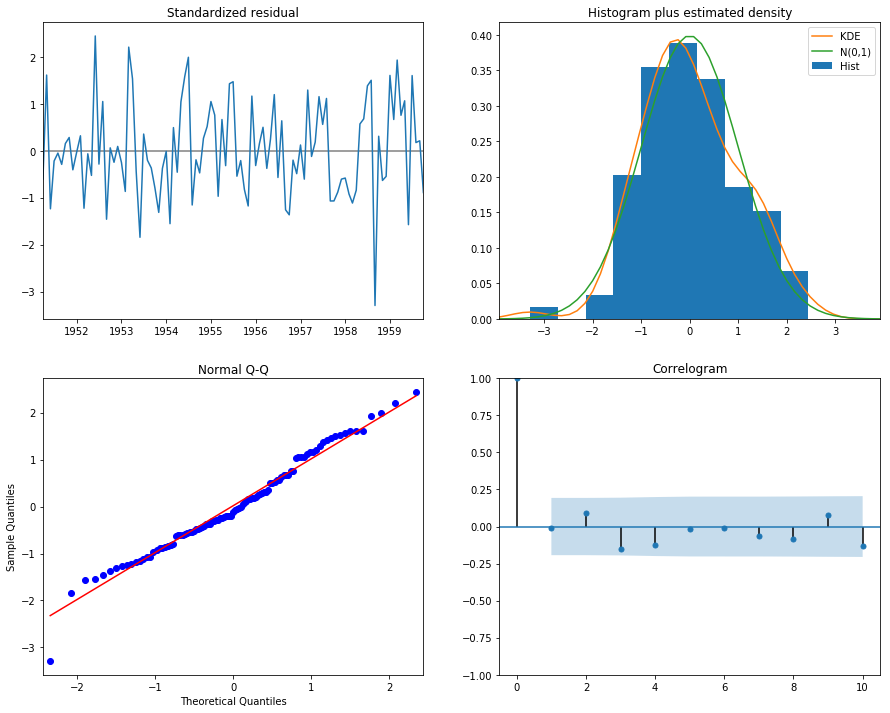

In [25]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [26]:
pred = results.get_prediction(start = 130, end = 143, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

,lower International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60,upper International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
1959-11-01,339.627295,381.869261
1959-12-01,361.358472,414.833692
1960-01-01,378.243667,440.971768
1960-02-01,355.951749,426.733314
1960-03-01,414.801987,492.809970


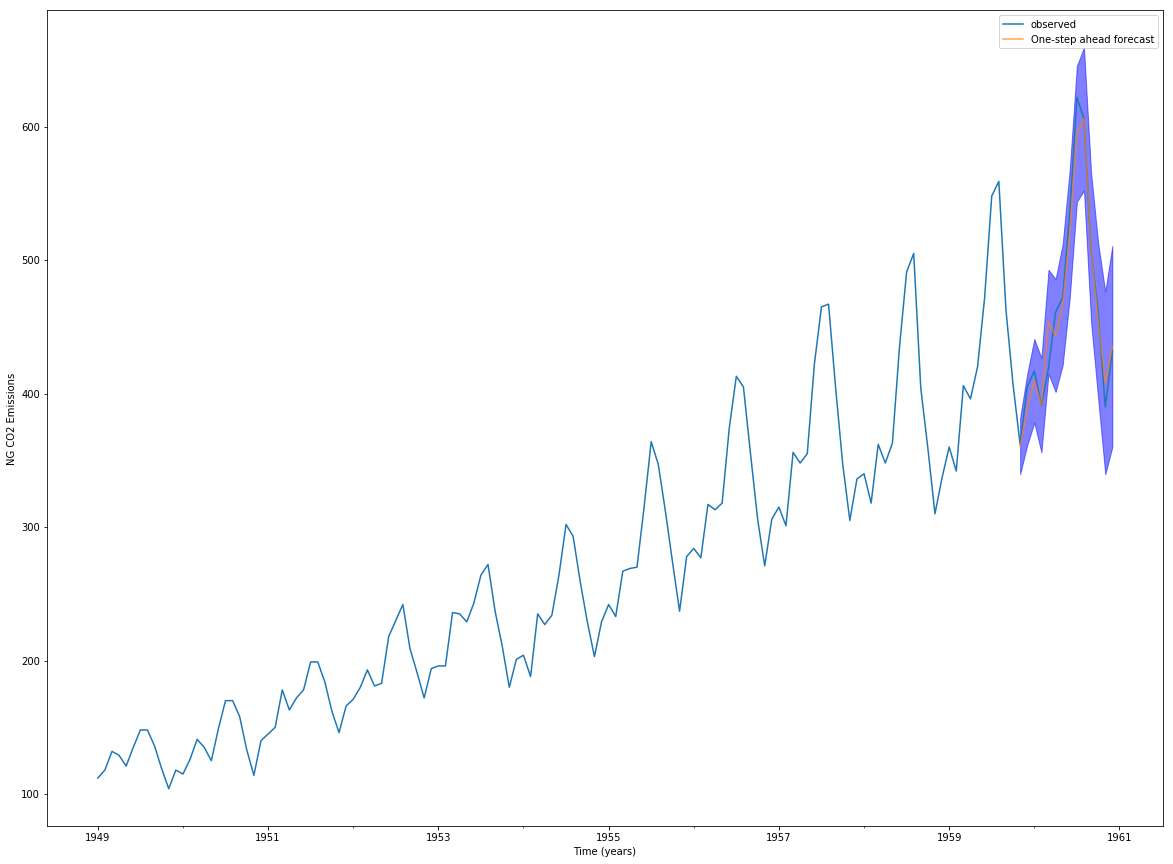

In [27]:
fig,axi = plt.subplots() 
fig.set_size_inches(20,15)
ax = ts.iloc[:,1].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='b', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('NG CO2 Emissions')
plt.legend()

plt.show()

In [100]:
mte_forecast = pred.predicted_mean
mte_truth = ts.iloc[130:,1]

# Compute the mean square error
mse = ((mte_forecast - mte_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(mse)))

arima_rmse = np.sqrt(mse)

The Mean Squared Error (MSE) of the forecast is 230.92
The Root Mean Square Error (RMSE) of the forcast: 15.1961


In [29]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps= 24)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.head()

,lower International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60,upper International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
1959-11-01,339.627295,381.869261
1959-12-01,361.358472,414.833692
1960-01-01,378.243667,440.971768
1960-02-01,355.951749,426.733314
1960-03-01,414.801987,492.809970


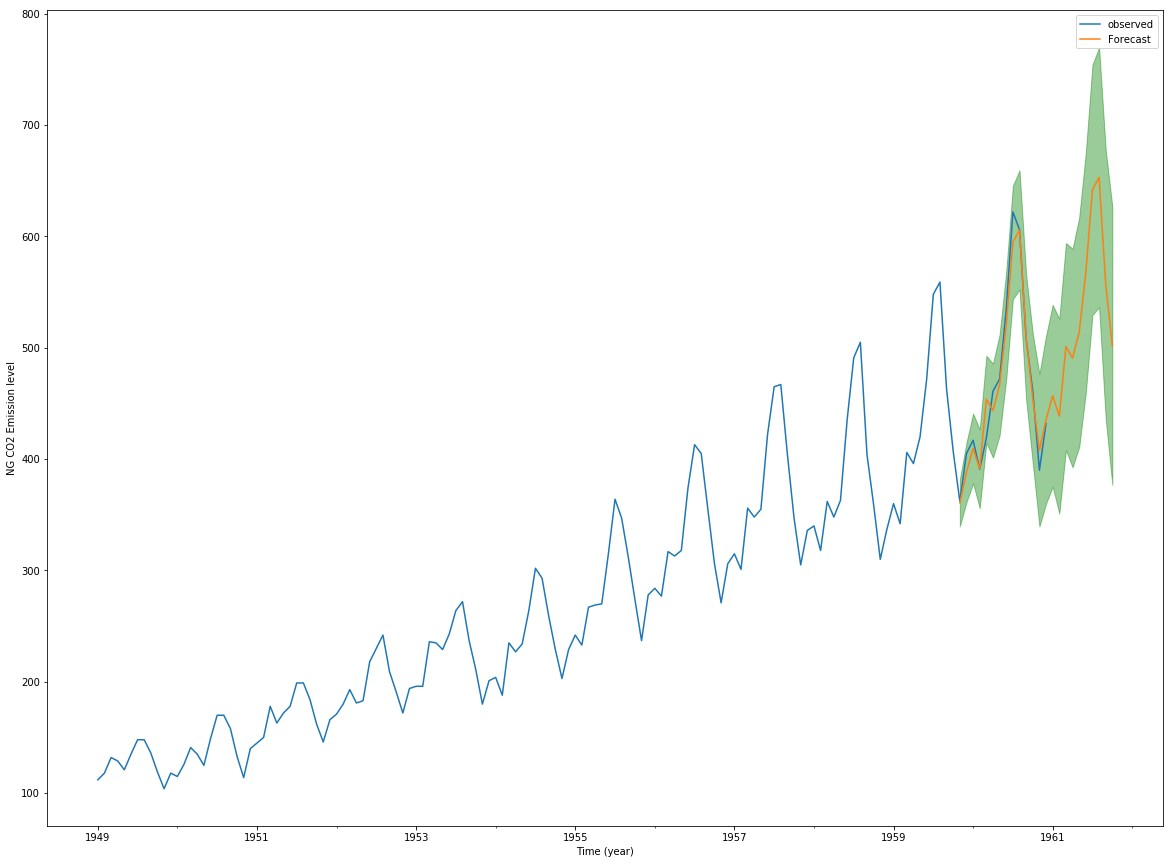

In [30]:
ax = ts.iloc[:,1].plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('NG CO2 Emission level')

plt.legend()
plt.show()

# DCNN

In [178]:
df1 = pd.read_csv("C:/Users/karna/Downloads/international-airline-passengers.csv")
df1.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [179]:
df1 = df1.dropna()

In [180]:
df1.Month = pd.to_datetime(df1.iloc[:,0]) 

In [181]:
df1['month_year'] = df1.Month.dt.to_period('M')

In [182]:
df1.Month = df1.month_year

In [183]:
df1 = df1.drop(['month_year'],axis=1)

In [184]:
data_start_date = df1.iloc[0,0]
data_end_date = df1.iloc[df1.shape[0]-1,0]
print('Data ranges from %s to %s' % (data_start_date, data_end_date))

Data ranges from 1949-01 to 1960-12


In [185]:
from datetime import timedelta

pred_steps = 12

first_day = data_start_date 
last_day = data_end_date

val_pred_start = last_day - pred_steps 
val_pred_end = last_day - 1

train_pred_start = val_pred_start - pred_steps
train_pred_end = val_pred_start - 1

In [186]:
enc_length = train_pred_start - first_day

train_enc_start = first_day
train_enc_end = train_enc_start + enc_length - 1

val_enc_start = train_enc_start + pred_steps 
val_enc_end = val_enc_start + enc_length - 1

In [187]:

print('Train encoding:', train_enc_start, '-', train_enc_end)
print('Train prediction:', train_pred_start, '-', train_pred_end, '\n')
print('Val encoding:', val_enc_start, '-', val_enc_end)
print('Val prediction:', val_pred_start, '-', val_pred_end)



Train encoding: 1949-01 - 1958-11
Train prediction: 1958-12 - 1959-11 

Val encoding: 1950-01 - 1959-11
Val prediction: 1959-12 - 1960-11


In [188]:
date_to_index = pd.Series(index=pd.Index([c for c in df1.iloc[:,0]]),
                          data=[i for i in range(len(df1.iloc[:,0]))])

series_array = df1.iloc[:,1]

def get_time_block_series(series_array, date_to_index, start_date, end_date):
    
    inds = date_to_index[start_date:end_date]
    return series_array[inds]

def transform_series_encode(series_array):
    
  
    series_mean = series_array.mean(axis=0) 
    series_array = series_array 
    series_array = series_array.reshape((1,series_array.shape[0], 1))
    
    return series_array, series_mean

def transform_series_decode(series_array, encode_series_mean):

    series_array = series_array 
    series_array = series_array.reshape((1,series_array.shape[0],1))
    
    return series_array

In [189]:
from keras.models import Model
from keras.layers import Input, Conv1D, Dense, Dropout, Lambda, concatenate
from keras.optimizers import Adam

# convolutional layer parameters
n_filters = 64 
filter_width = 2
dilation_rates = [2**i for i in range(4)] 

# define an input history series and pass it through a stack of dilated causal convolutions. 
history_seq = Input(shape=(None, 1))
x = history_seq

for dilation_rate in dilation_rates:
    x = Conv1D(filters=n_filters,
               kernel_size=filter_width, 
               padding='causal',
               dilation_rate=dilation_rate)(x)

x = Dense(8, activation='relu')(x)
x = Dense(1)(x)

# extract the last 14 time steps as the training target
def slice(x, seq_length):
    return x[:,-seq_length:,:]

pred_seq_train = Lambda(slice, arguments={'seq_length':12})(x)

model = Model(history_seq, pred_seq_train)

In [190]:
first_n_samples = 144
epochs = 100

# sample of series from train_enc_start to train_enc_end  
encoder_input_data = get_time_block_series(series_array, date_to_index, 
                                           train_enc_start, train_enc_end)
encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

# sample of series from train_pred_start to train_pred_end 
decoder_target_data = get_time_block_series(series_array, date_to_index, 
                                            train_pred_start, train_pred_end)
decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)


# we append a lagged history of the target series to the input data, 
# so that we can train with teacher forcing
lagged_target_history = decoder_target_data[:,:-1,:1]

encoder_input_data = np.concatenate([encoder_input_data, lagged_target_history], axis=1)
print(encoder_input_data.shape,decoder_target_data.shape)
model.compile(Adam(lr=0.001), loss='mean_absolute_error')
history = model.fit(encoder_input_data, decoder_target_data,
                    epochs=epochs)

C:\Users\karna\Anaconda\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()
C:\Users\karna\Anaconda\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


(1, 130, 1) (1, 12, 1)
Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 452.5946
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 223.3275
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 51.1107
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 138.2052
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 97.5311
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 43.2899
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 107.4701
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 95.6946
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 52.7355
Epoch 10/100
1/1 [==============================] - 0s 22ms/step - loss: 51.3465
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 71.1240
Epoch 12/100
1/1 [==============================] - 0s 11ms/step - loss: 67.0063
Epoch 13/100
1/1 

In [191]:
def predict_sequence(input_sequence):

    history_sequence = input_sequence.copy()
    pred_sequence = np.zeros((1,pred_steps+2,1)) # initialize output (pred_steps time steps)  
    
    for i in range(pred_steps+2):
        
        # record next time step prediction (last time step of model output) 
        last_step_pred = model.predict(history_sequence)[0,-1,0]
        pred_sequence[0,i,0] = last_step_pred
        
        # add the next time step prediction to the history sequence
        history_sequence = np.concatenate([history_sequence, 
                                           last_step_pred.reshape(-1,1,1)], axis=1)

    return pred_sequence

In [232]:
def predict_and_plot(encoder_input_data, decoder_target_data, sample_ind, enc_tail_len=144):


    
    encode_series = encoder_input_data[sample_ind:sample_ind+1,:,:] 
    pred_series = predict_sequence(encode_series)
    
    decoder_target_data = get_time_block_series(series_array, date_to_index, 
                                            val_pred_start-1, val_pred_end+1)
    decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)
    
    encode_series = encode_series.reshape(-1,1)
    pred_series = pred_series.reshape(-1,1)   
    target_series = decoder_target_data[sample_ind,:,:1].reshape(-1,1) 
    
    encode_series_tail = np.concatenate([encode_series[-enc_tail_len:],target_series[:1]])
    x_encode = encode_series_tail.shape[0]
  
    plt.figure(figsize=(10,6))   
    
    plt.plot(range(1,x_encode+1),encode_series_tail)
    plt.plot(range(x_encode,x_encode+pred_steps+2),target_series,color='orange')
    plt.plot(range(x_encode,x_encode+pred_steps+2),pred_series[:],color='teal',linestyle='--')
    plt.xlabel("Time(in Years)")
    plt.ylabel("No. of Passengers")
    
    plt.title('Airline Passengers Data')
    plt.legend(['Original Series','Target Series','Predictions'])

C:\Users\karna\Anaconda\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


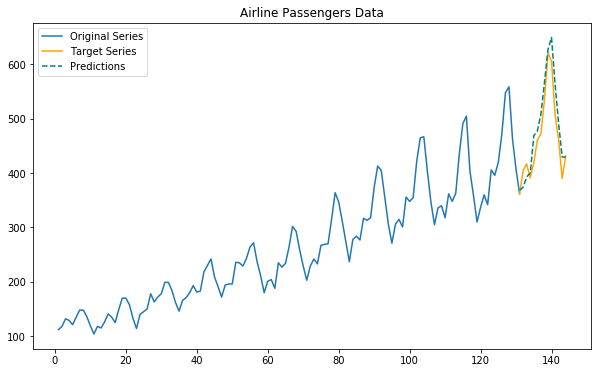

In [233]:
predict_and_plot(encoder_input_data, decoder_target_data, 0)

In [194]:
encode_series = encoder_input_data[0:1,:,:] 

pred_series = predict_sequence(encode_series)
pred_series = pred_series.reshape(-1,1)

mte_truth = df1.iloc[130:144,1]
mte_truth = mte_truth.values.reshape(-1,1)

# Compute the mean square error
mse = ((pred_series - mte_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {}'
      .format(np.sqrt(mse)))

DCNN_rmse = np.sqrt(mse)

The Mean Squared Error (MSE) of the forecast is 1019.36
The Root Mean Square Error (RMSE) of the forcast: 31.927371802207897


# LSTM

In [195]:
import math

In [196]:
ap = pd.read_csv("C:/Users/karna/Downloads/international-airline-passengers.csv",usecols = [1])

In [197]:
ap=ap.dropna()
ap.shape

(144, 1)

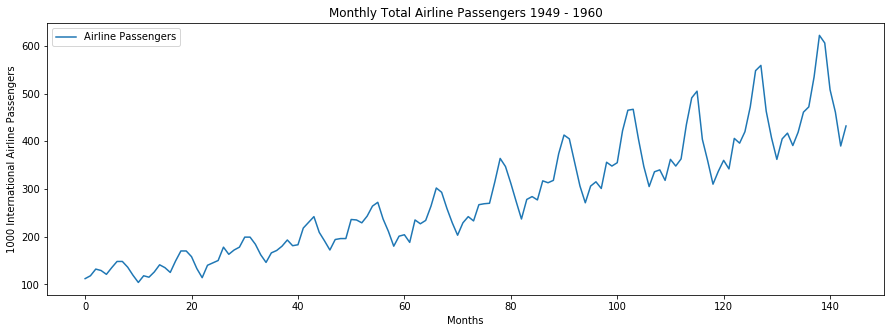

In [198]:
plt.figure(figsize = (15, 5))
plt.plot(ap, label = "Airline Passengers")
plt.xlabel("Months")
plt.ylabel("1000 International Airline Passengers")
plt.title("Monthly Total Airline Passengers 1949 - 1960")
plt.legend()
plt.show()

In [199]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

In [200]:
ap = ap.values.astype("float32")
type(ap)

numpy.ndarray

In [201]:
scaler = MinMaxScaler(feature_range = (0, 1))
ap_scaled = scaler.fit_transform(ap)
type(ap_scaled)

numpy.ndarray

In [202]:
train_size = 130
test_size = len(ap_scaled) - train_size
train, test = ap_scaled[0:train_size, :], ap_scaled[train_size:len(ap_scaled), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (130, 14)


In [203]:
def create_dataset(dataset, window_size = 1):
    data_X = dataset[:(len(dataset) - window_size)]
    data_Y = np.roll(dataset, -1)[:-1]
    return(data_X, data_Y.reshape(len(data_Y),))

In [204]:
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

Original training data shape:
(129, 1)
(129,)
(13, 1)
(13,)


In [205]:
# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)
print(test_X.shape)

New training data shape:
(129, 1, 1)
(13, 1, 1)


In [206]:
def fit_model(train_X, train_Y, window_size = 1):
    model = Sequential()
    
    model.add(LSTM(3, 
                   input_shape = (1, window_size)))
    model.add(Dense(1))
    model.compile(loss = "mean_squared_error", 
                  optimizer = "adam")
    model.fit(train_X, 
              train_Y, 
              epochs = 100, 
              batch_size = 1, 
              verbose = 2)
    
    return(model)


In [207]:
model_ap = fit_model(train_X, train_Y, window_size)

Epoch 1/100
 - 2s - loss: 0.0934
Epoch 2/100
 - 0s - loss: 0.0443
Epoch 3/100
 - 0s - loss: 0.0313
Epoch 4/100
 - 0s - loss: 0.0278
Epoch 5/100
 - 0s - loss: 0.0247
Epoch 6/100
 - 1s - loss: 0.0217
Epoch 7/100
 - 0s - loss: 0.0186
Epoch 8/100
 - 0s - loss: 0.0156
Epoch 9/100
 - 0s - loss: 0.0128
Epoch 10/100
 - 0s - loss: 0.0102
Epoch 11/100
 - 1s - loss: 0.0080
Epoch 12/100
 - 0s - loss: 0.0065
Epoch 13/100
 - 0s - loss: 0.0054
Epoch 14/100
 - 0s - loss: 0.0045
Epoch 15/100
 - 0s - loss: 0.0041
Epoch 16/100
 - 1s - loss: 0.0039
Epoch 17/100
 - 0s - loss: 0.0037
Epoch 18/100
 - 0s - loss: 0.0036
Epoch 19/100
 - 0s - loss: 0.0037
Epoch 20/100
 - 0s - loss: 0.0036
Epoch 21/100
 - 0s - loss: 0.0035
Epoch 22/100
 - 0s - loss: 0.0036
Epoch 23/100
 - 0s - loss: 0.0036
Epoch 24/100
 - 1s - loss: 0.0036
Epoch 25/100
 - 0s - loss: 0.0036
Epoch 26/100
 - 0s - loss: 0.0036
Epoch 27/100
 - 0s - loss: 0.0036
Epoch 28/100
 - 1s - loss: 0.0035
Epoch 29/100
 - 1s - loss: 0.0035
Epoch 30/100
 - 1s - lo

In [208]:
def predict_and_score(model, X, Y):
    # Make predictions on the original scale of the data.
    pred = scaler.inverse_transform(model.predict(X))
    # Prepare Y data to also be on the original scale for interpretability.
    orig_data = scaler.inverse_transform([Y])
    # Calculate RMSE.
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_predict = predict_and_score(model_ap, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model_ap, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

Training data score: 30.91 RMSE
Test data score: 49.00 RMSE


In [209]:
LSTM_rmse = rmse_test

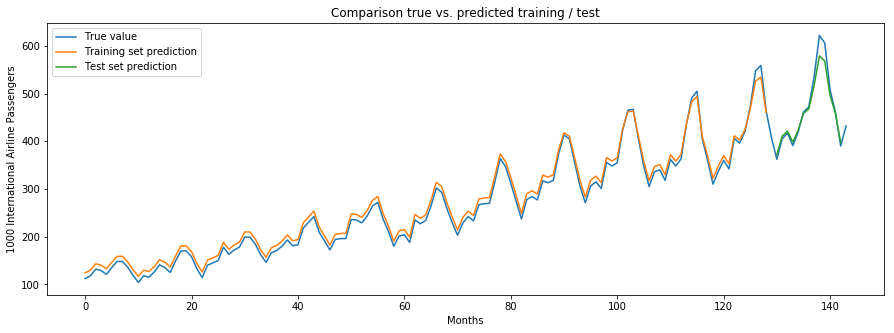

In [210]:
def shift(l, n):
       return l[n:] + l[:n]
    

# Start with training predictions.
train_predict_plot = np.empty_like(ap_scaled)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

# Add test predictions.
test_predict_plot = np.empty_like(ap_scaled)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + window_size:len(ap_scaled) - 1, :] = test_predict
# Create the plot.
plt.figure(figsize = (15, 5))
plt.plot(scaler.inverse_transform(ap_scaled), label = "True value")
plt.plot(np.roll(train_predict_plot,-1), label = "Training set prediction")
plt.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Months")
plt.ylabel("1000 International Airline Passengers")
plt.title("Comparison true vs. predicted training / test")
plt.legend()
plt.show()

# XGBOOST

In [211]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import imageio
import os
from statsmodels.graphics.tsaplots import plot_acf

In [212]:
df1 = pd.read_csv("C:/Users/karna/Downloads/international-airline-passengers.csv",index_col=[0])
df1.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [213]:
df1 = df1.dropna()

df1.reset_index(inplace=True)

df1['Month'] = pd.to_datetime(df1['Month'])

df1 = df1.set_index('Month')


In [214]:
def split_data(data, split_date):
    return data[data.index <= split_date].copy(), \
           data[data.index >  split_date].copy()

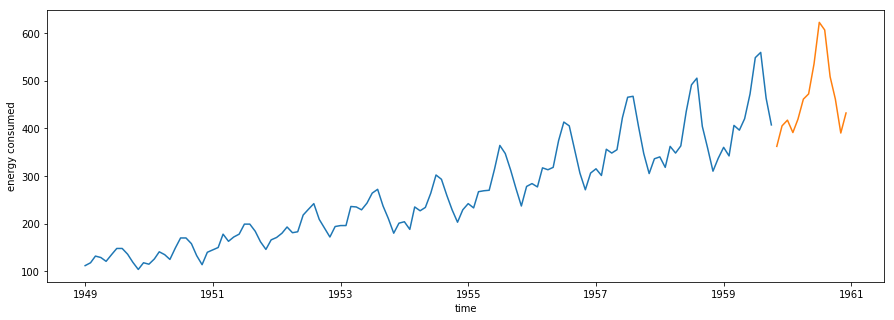

In [215]:
train, test = split_data(df1,'1959-10')

plt.figure(figsize=(15,5))
plt.xlabel('time')
plt.ylabel('energy consumed')
plt.plot(train.index,train)
plt.plot(test.index,test)
plt.show()

In [216]:
def create_features(df):
    df['date'] = df.index
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    
    X = df[['year','month']]
    return X

In [217]:
X_train, y_train = create_features(train), train.iloc[:,0]
X_test, y_test   = create_features(test), test.iloc[:,0]

X_train.shape, y_train.shape

((130, 2), (130,))

In [218]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,eval_set=[(X_train, y_train), (X_test, y_test)],early_stopping_rounds=50,verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [219]:
def plot_performance(base_data, date_from, date_to, title=None):
    plt.figure(figsize=(15,3))
    if title == None:
        plt.title('From {0} To {1}'.format(date_from, date_to))
    else:
        plt.title(title)
    plt.xlabel('time')
    plt.ylabel('energy consumed')
    plt.plot(df1.index,df1, label='data')
    plt.plot(X_test.index,X_test_pred, label='prediction')
    plt.legend()
    plt.xlim(left=date_from, right=date_to)

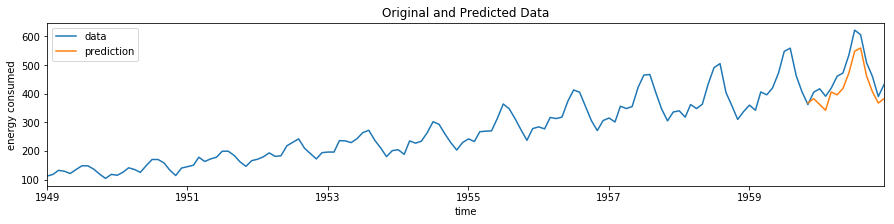

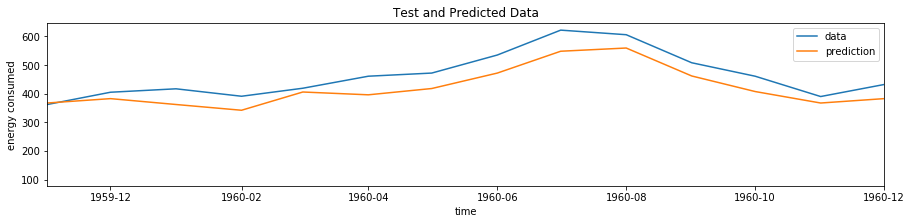

In [220]:
X_test_pred = reg.predict(X_test)
    
plot_performance(df1, df1.index[0].date(), df1.index[-1].date(),
                 'Original and Predicted Data')

plot_performance(y_test, y_test.index[0].date(), y_test.index[-1].date(),
                 'Test and Predicted Data')


plt.legend()

plt.show()

In [221]:
print("RMSE",np.sqrt(mean_squared_error(y_true=y_test,y_pred=X_test_pred)))

RMSE 48.38181260870448


In [222]:
XGBOOST_rmse = np.sqrt(mean_squared_error(y_true=y_test,y_pred=X_test_pred))

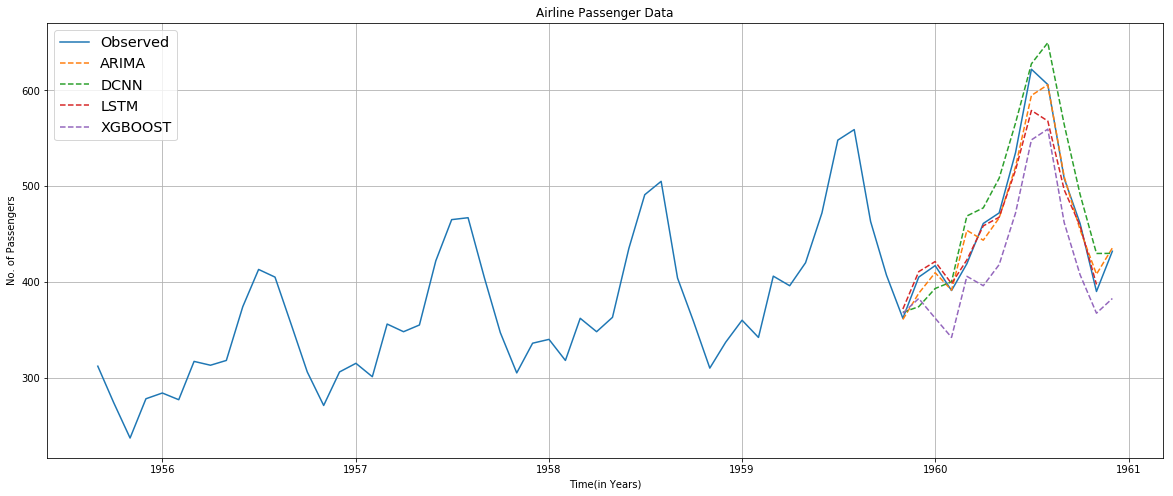

In [223]:
arima = ts.iloc[:,1]
arima_predicted = pred.predicted_mean

fig,axi = plt.subplots() 
fig.set_size_inches(20,8)
plt.plot(df1.index[80:],arima[80:],label='Observed')
plt.plot(df1.index[130:],arima_predicted[:],label='ARIMA',linestyle='--')
plt.plot(df1.index[130:],pred_series,label='DCNN',linestyle='--')
plt.plot(df1.index[130:],test_predict_plot[130:],label="LSTM",linestyle='--')
plt.plot(df1.index[130:],X_test_pred ,label='XGBOOST',linestyle='--')
plt.xlabel("Time(in Years)")
plt.ylabel("No. of Passengers")
plt.title("Airline Passenger Data")
plt.legend(fontsize='x-large')
plt.grid()

In [224]:
RMSE = []
RMSE.append(arima_rmse)
RMSE.append(DCNN_rmse)
RMSE.append(LSTM_rmse)
RMSE.append(XGBOOST_rmse)

In [226]:
x=np.asarray(RMSE)

Text(0,0.5,'RMSE values')

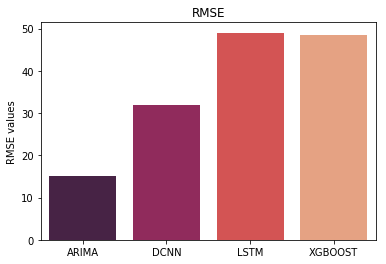

In [227]:
import seaborn as sns

sns.barplot(x=['ARIMA','DCNN','LSTM','XGBOOST'],y=x, palette="rocket")
plt.title("RMSE")
plt.ylabel("RMSE values")